In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, root_mean_squared_error, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Task 1

In [3]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
missing_values = df.isnull().sum().sort_values(ascending=False)
display(missing_values[missing_values > 0])


Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
dtype: int64

In [28]:
threshold = 0.8
df = df[df.columns[df.isnull().mean() < threshold]]

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('None')

df = pd.get_dummies(df, drop_first=True)

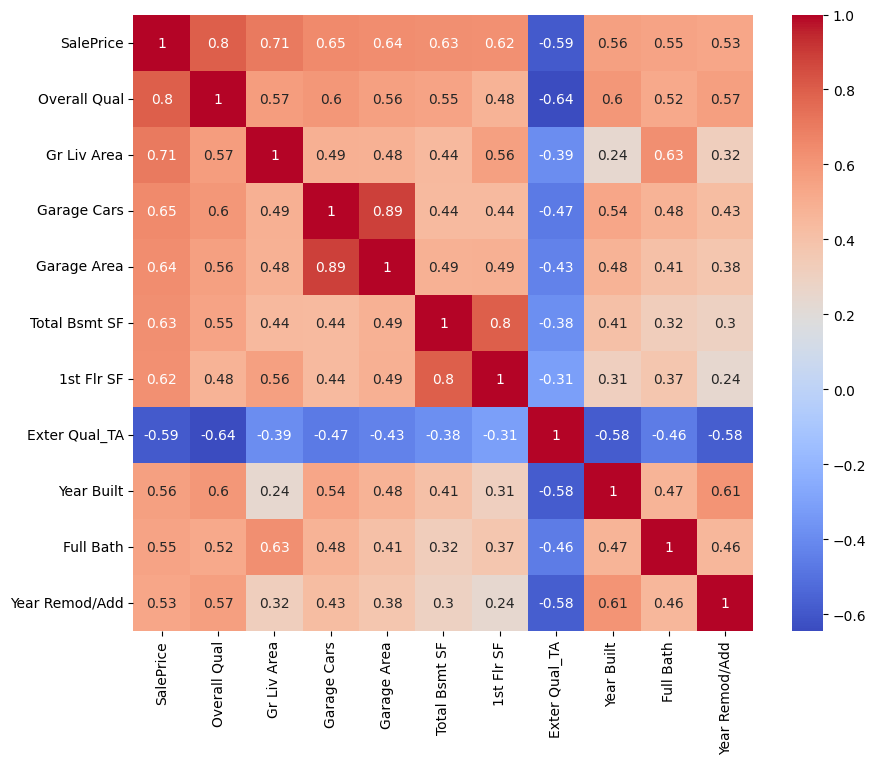

In [32]:
corr_max = df.corr()

top_features = corr_max['SalePrice'].abs().sort_values(ascending=False).head(11).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.show()

In [55]:
X = df.drop('SalePrice', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression()

LRModel = LR.fit(X_train, y_train)

model_columns = X_train.columns

y_pred = LRModel.predict(X_test)

print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')
print(f"Mean Sale Price: {y_test.mean():,.2f}")
print(f'RMSE: {root_mean_squared_error(y_test, y_pred):.2f}')

R^2 Score: 0.89
Mean Sale Price: 189,651.47
RMSE: 29021.11


In [54]:
new_data = pd.DataFrame({
    'OverallQual': [7],
    'GrLivArea': [2000],
    'GarageCars': [2],
    'TotalBsmtSF': [1000],
    'YearBuilt': [2005],
    '1stFlrSF': [1100],
    '2ndFlrSF': [900],
    'FullBath': [2],
    'TotRmsAbvGrd': [7],
    'Fireplaces': [1],
    'Neighborhood': ['CollgCr'],
    'KitchenQual': ['Gd'],
    'GarageFinish': ['RFn'],
    'BsmtQual': ['Ex'],
    'ExterQual': ['Gd']
})

new_data = pd.get_dummies(new_data, drop_first=True)

new_data_encoded = new_data.reindex(columns=model_columns, fill_value=0)

predicted_price = LRModel.predict(new_data_encoded)
print(f'Predicted Sale Price: ${predicted_price[0]:,.2f}')

Predicted Sale Price: $1,118,320.09


# Task 2

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [59]:
word_freq = [f'word_freq_{i}' for i in range(48)]
char_freq = [f'char_freq_{i}' for i in range(6)]
capital_run = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
columns = word_freq + char_freq + capital_run + ['target']
df.columns = columns

df.head()

,word_freq_0,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,...,char_freq_0,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [68]:
df.isna().sum()

word_freq_0                   0
word_freq_1                   0
word_freq_2                   0
word_freq_3                   0
word_freq_4                   0
word_freq_5                   0
word_freq_6                   0
word_freq_7                   0
word_freq_8                   0
word_freq_9                   0
word_freq_10                  0
word_freq_11                  0
word_freq_12                  0
word_freq_13                  0
word_freq_14                  0
word_freq_15                  0
word_freq_16                  0
word_freq_17                  0
word_freq_18                  0
word_freq_19                  0
word_freq_20                  0
word_freq_21                  0
word_freq_22                  0
word_freq_23                  0
word_freq_24                  0
word_freq_25                  0
word_freq_26                  0
word_freq_27                  0
word_freq_28                  0
word_freq_29                  0
word_freq_30                  0
word_fre

In [77]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred=y_pred))

0.9348534201954397


In [83]:
# Simulated values based on average ranges from the dataset
fake_email_input = np.array([[
    0.0,    # word_freq_make
    0.0,    # word_freq_address
    0.15,   # word_freq_all
    0.0,    # word_freq_3d
    0.2,    # word_freq_our
    0.1,    # word_freq_over
    0.0,    # word_freq_remove
    0.1,    # word_freq_internet
    0.0,    # word_freq_order
    0.0,    # word_freq_mail
    0.2,    # word_freq_receive
    0.0,    # word_freq_will
    0.0,    # word_freq_people
    0.0,    # word_freq_report
    0.0,    # word_freq_addresses
    0.0,    # word_freq_free
    0.0,    # word_freq_business
    0.0,    # word_freq_email
    0.0,    # word_freq_you
    0.0,    # word_freq_credit
    0.0,    # word_freq_your
    0.0,    # word_freq_font
    0.0,    # word_freq_000
    0.0,    # word_freq_money
    0.0,    # word_freq_hp
    0.0,    # word_freq_hpl
    0.0,    # word_freq_george
    0.0,    # word_freq_650
    0.0,    # word_freq_lab
    0.0,    # word_freq_labs
    0.0,    # word_freq_telnet
    0.0,    # word_freq_857
    0.0,    # word_freq_data
    0.0,    # word_freq_415
    0.0,    # word_freq_85
    0.0,    # word_freq_technology
    0.0,    # word_freq_1999
    0.0,    # word_freq_parts
    0.0,    # word_freq_pm
    0.0,    # word_freq_direct
    0.0,    # word_freq_cs
    0.0,    # word_freq_meeting
    0.0,    # word_freq_original
    0.0,    # word_freq_project
    0.0,    # word_freq_re
    0.0,    # word_freq_edu
    0.0,    # word_freq_table
    0.0,    # word_freq_conference
    0.0,    # char_freq_;:
    0.0,    # char_freq_(
    0.0,    # char_freq_[
    0.0,    # char_freq_!
    0.0,    # char_freq_$
    0.0,    # char_freq_#
    2.0,    # capital_run_length_average
    5.0,    # capital_run_length_longest
    40.0    # capital_run_length_total
]])

fake_email_df = pd.DataFrame(fake_email_input, columns=columns[:-1])
scaled_input = scaler.transform(fake_email_input)
prediction = svm.predict(scaled_input)

print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")

Prediction: Not Spam


c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Task 3

In [101]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [89]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [103]:
df = df.dropna(subset=['CustomerID'])

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [106]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']

customer_spending = df.groupby('CustomerID')['Total Price'].sum().reset_index()
customer_spending

,CustomerID,Total Price
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [111]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

latest_date = df['InvoiceDate'].max()

recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (latest_date - recency['InvoiceDate']).dt.days
recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
4333,18280.0,2011-03-07 09:52:00,277
4334,18281.0,2011-06-12 10:53:00,180
4335,18282.0,2011-12-02 11:43:00,7
4336,18283.0,2011-12-06 12:02:00,3


In [115]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [118]:
customer_data = customer_spending.merge(recency[['CustomerID', 'Recency']], on='CustomerID')
customer_data = customer_data.merge(frequency, on='CustomerID')
customer_data

,CustomerID,Total Price,Recency,Frequency
0,12346.0,77183.60,325,1
1,12347.0,4310.00,1,7
2,12348.0,1797.24,74,4
3,12349.0,1757.55,18,1
4,12350.0,334.40,309,1
...,...,...,...,...
4333,18280.0,180.60,277,1
4334,18281.0,80.82,180,1
4335,18282.0,178.05,7,2
4336,18283.0,2094.88,3,16


In [127]:
threshold = customer_data['Total Price'].quantile(0.75)
customer_data['HighValue'] = (customer_data['Total Price'] >= threshold).astype(int)
customer_data

,CustomerID,Total Price,Recency,Frequency,HighValue
0,12346.0,77183.60,325,1,1
1,12347.0,4310.00,1,7,1
2,12348.0,1797.24,74,4,1
3,12349.0,1757.55,18,1,1
4,12350.0,334.40,309,1,0
...,...,...,...,...,...
4333,18280.0,180.60,277,1,0
4334,18281.0,80.82,180,1,0
4335,18282.0,178.05,7,2,0
4336,18283.0,2094.88,3,16,1


In [144]:
X = customer_data.drop(['CustomerID', 'HighValue'], axis=1)
y = customer_data['HighValue']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       653
           1       0.97      0.90      0.93       215

    accuracy                           0.97       868
   macro avg       0.97      0.95      0.96       868
weighted avg       0.97      0.97      0.97       868

